In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-plate-detection/annotations/Cars339.xml
/kaggle/input/car-plate-detection/annotations/Cars13.xml
/kaggle/input/car-plate-detection/annotations/Cars74.xml
/kaggle/input/car-plate-detection/annotations/Cars16.xml
/kaggle/input/car-plate-detection/annotations/Cars291.xml
/kaggle/input/car-plate-detection/annotations/Cars236.xml
/kaggle/input/car-plate-detection/annotations/Cars429.xml
/kaggle/input/car-plate-detection/annotations/Cars132.xml
/kaggle/input/car-plate-detection/annotations/Cars251.xml
/kaggle/input/car-plate-detection/annotations/Cars51.xml
/kaggle/input/car-plate-detection/annotations/Cars165.xml
/kaggle/input/car-plate-detection/annotations/Cars313.xml
/kaggle/input/car-plate-detection/annotations/Cars240.xml
/kaggle/input/car-plate-detection/annotations/Cars201.xml
/kaggle/input/car-plate-detection/annotations/Cars412.xml
/kaggle/input/car-plate-detection/annotations/Cars227.xml
/kaggle/input/car-plate-detection/annotations/Cars145.xml
/kaggle/input/car-

In [2]:
import os 
import cv2
import shutil
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 19.5 MB/s eta 0:00:0000:01


In [4]:
!pip install --upgrade ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.9 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.7
    Uninstalling widgetsnbextension-3.6.7:
      Successfully uninstalled widgetsnbextension-3.6.7
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [5]:
dataset_path = '/kaggle/input/car-plate-detection'

In [6]:
import re 

def the_number_in_the_string(filename):
    match = re.search(r'(\d+)',filename)
    if match:
        return int(match.group(0))
    else:
        return 0

In [7]:
label_dict = dict(img_path=[],
                 x_max=[],
                 x_min=[],
                 y_max=[],
                 y_min=[],
                 img_h=[],
                 img_w=[])

In [8]:
from glob import glob

xml_files = glob(f'{dataset_path}/annotations/*.xml')

In [9]:
for filename in sorted(xml_files,key = the_number_in_the_string):
    info = xet.parse(filename)
    root = info.getroot()
    
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)
    
    
    img_name = root.find('filename').text
    img_path = os.path.join(dataset_path,"images",img_name)
    
    img_h,img_w,_  = cv2.imread(img_path).shape
    
    label_dict["img_path"].append(img_path)
    label_dict["x_min"].append(xmin)
    label_dict["x_max"].append(xmax)
    label_dict["y_min"].append(ymin)
    label_dict["y_max"].append(ymax)
    label_dict["img_h"].append(img_h)
    label_dict["img_w"].append(img_w)

In [10]:
all_data = pd.DataFrame(label_dict)
all_data

,img_path,x_max,x_min,y_max,y_min,img_h,img_w
0,/kaggle/input/car-plate-detection/images/Cars0...,419,226,173,125,268,500
1,/kaggle/input/car-plate-detection/images/Cars1...,262,134,160,128,248,400
2,/kaggle/input/car-plate-detection/images/Cars2...,270,229,193,176,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,261,142,157,128,225,400
4,/kaggle/input/car-plate-detection/images/Cars4...,503,156,253,82,350,590
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,258,142,157,128,225,400
429,/kaggle/input/car-plate-detection/images/Cars4...,208,86,195,166,400,301
430,/kaggle/input/car-plate-detection/images/Cars4...,116,38,197,159,225,400
431,/kaggle/input/car-plate-detection/images/Cars4...,343,55,147,82,192,400


In [11]:
train,test = train_test_split(all_data,test_size=0.1,random_state=42)
train,val = train_test_split(train,train_size=8/9,random_state=42)

In [12]:
train

,img_path,x_max,x_min,y_max,y_min,img_h,img_w
124,/kaggle/input/car-plate-detection/images/Cars1...,320,305,267,256,267,400
315,/kaggle/input/car-plate-detection/images/Cars3...,385,12,181,98,300,400
282,/kaggle/input/car-plate-detection/images/Cars2...,319,37,203,145,263,350
236,/kaggle/input/car-plate-detection/images/Cars2...,250,223,119,106,176,400
112,/kaggle/input/car-plate-detection/images/Cars1...,164,49,191,135,400,240
...,...,...,...,...,...,...,...
110,/kaggle/input/car-plate-detection/images/Cars1...,328,286,159,133,267,400
255,/kaggle/input/car-plate-detection/images/Cars2...,273,116,188,156,267,400
292,/kaggle/input/car-plate-detection/images/Cars2...,137,91,208,187,267,400
54,/kaggle/input/car-plate-detection/images/Cars5...,257,148,118,61,300,400


In [13]:
import os
import shutil

def make_split_folder_in_yolo_format(split_name, split_df):
    labels_path = os.path.join('datasets', 'cars_licence_late_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_licence_late_new', split_name, 'images')
    
    # Create the directories, allowing existing directories without raising an error
    os.makedirs(labels_path, exist_ok=True)
    os.makedirs(images_path, exist_ok=True)

    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))
        
        x_center = (row['x_min'] + row['x_max']) / 2 / row['img_w']
        y_center = (row['y_min'] + row['y_max']) / 2 / row['img_h']
        width = (row['x_max'] - row['x_min']) / row['img_w']
        height = (row['y_max'] - row['y_min']) / row['img_h']
        
        # Construct the full file path correctly
        label_file_path = os.path.join(labels_path, f'{img_name}.txt')
        
        with open(label_file_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")
        
        # Copy the image file to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))

# Call the function for train, val, and test splits
make_split_folder_in_yolo_format("train", train)
make_split_folder_in_yolo_format("val", val)
make_split_folder_in_yolo_format("test", test)


In [14]:
# Content for the datasets.yaml file
yaml_content = '''
path: cars_licence_late_new

train: train/images
val: val/images
test: test/images

nc: 1
names: ['license_plate']
'''

# Write the content to datasets.yaml
with open('datasets.yaml', 'w') as file:
    file.write(yaml_content)


In [15]:
from ultralytics import YOLO

In [16]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 96.8MB/s]


In [17]:
model.train(
data = 'datasets.yaml',
epochs = 100,
batch = 16,
device = 'cuda',
imgsz = 320,
cache = True)

#model.train(data='data.yaml', model='yolov8n.pt', epochs=10, lr0=0.01, batch=16)


Ultralytics YOLOv8.2.90 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/cars_licence_late_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 494.64it/s]


train: New cache created: /kaggle/working/datasets/cars_licence_late_new/train/labels.cache


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:01<00:00, 201.53it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cars_licence_late_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 441.17it/s]

val: New cache created: /kaggle/working/datasets/cars_licence_late_new/val/labels.cache



val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 182.68it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.908G      1.781      2.988       1.34         18        320: 100%|██████████| 22/22 [00:04<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         44         44    0.00358      0.955      0.375      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.849G      1.522      1.508      1.134         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]


                   all         44         44     0.0121      0.523      0.212      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.858G      1.526      1.402      1.184         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         44         44      0.681      0.114      0.242      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.872G      1.491      1.315      1.137         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]

                   all         44         44      0.724      0.159      0.303       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.872G      1.532      1.281      1.195         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]


                   all         44         44      0.532      0.455      0.508      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.872G      1.418      1.166      1.149         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all         44         44      0.646      0.591      0.609      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.864G      1.462      1.126       1.15         17        320: 100%|██████████| 22/22 [00:01<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]

                   all         44         44      0.601      0.568      0.564      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.872G      1.463      1.122       1.14         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]


                   all         44         44      0.785      0.746       0.76      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.866G      1.361      1.066      1.114         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]


                   all         44         44      0.804      0.838      0.844      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.872G      1.423      1.076      1.126         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]

                   all         44         44      0.683      0.687      0.723      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.866G      1.366      1.024      1.114         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]


                   all         44         44      0.928      0.682      0.808      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.872G      1.332      0.977      1.109         21        320: 100%|██████████| 22/22 [00:01<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]

                   all         44         44      0.808      0.795      0.833      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.866G      1.347      0.927      1.099         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.40it/s]


                   all         44         44      0.842       0.75      0.834      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.872G      1.326     0.9493      1.115         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


                   all         44         44      0.876      0.818      0.877       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.866G      1.353     0.9518        1.1         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]


                   all         44         44      0.806      0.864      0.865       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.872G      1.298      0.912       1.08         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]


                   all         44         44      0.849      0.841      0.858      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.866G      1.294     0.8707       1.11         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]


                   all         44         44      0.921      0.864      0.888      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.872G       1.27     0.8547      1.074         24        320: 100%|██████████| 22/22 [00:01<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]


                   all         44         44      0.762      0.802       0.78      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.864G      1.275       0.86      1.073         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]

                   all         44         44      0.763      0.909      0.848       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.872G      1.215     0.8126      1.031         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all         44         44      0.858      0.823      0.841      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.866G      1.198     0.8107      1.054         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all         44         44       0.86      0.864      0.903      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.872G      1.225     0.8044      1.048         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.16it/s]

                   all         44         44      0.923      0.909      0.948      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.866G      1.219      0.789      1.048         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         44         44      0.974      0.864      0.932      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.872G      1.183     0.7634      1.061         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.87it/s]

                   all         44         44      0.887      0.888      0.895      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.866G       1.19     0.7904      1.064         22        320: 100%|██████████| 22/22 [00:01<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]


                   all         44         44      0.929      0.887      0.937      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.872G      1.184     0.7288      1.023         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         44         44      0.909      0.886       0.93      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.866G      1.177     0.7442      1.016         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]

                   all         44         44      0.928      0.879      0.887      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.872G      1.202     0.7743      1.046         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]

                   all         44         44      0.885      0.877      0.881      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.866G      1.155     0.7461      1.019         22        320: 100%|██████████| 22/22 [00:01<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         44         44      0.951      0.886      0.893        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.872G      1.179     0.7276      1.026         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all         44         44      0.949      0.909      0.931      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.864G      1.135      0.713      1.016         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]


                   all         44         44      0.814      0.841      0.852      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.872G      1.136     0.7321      1.012         22        320: 100%|██████████| 22/22 [00:01<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]

                   all         44         44      0.946      0.886      0.912       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.866G      1.143     0.7191      1.017         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all         44         44      0.877      0.841      0.874      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.872G      1.108     0.7056       1.01         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.20it/s]

                   all         44         44      0.863      0.862      0.876      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.866G      1.179     0.7284      1.026         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.69it/s]

                   all         44         44      0.948      0.886      0.925      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.872G      1.112     0.6798     0.9993         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.66it/s]

                   all         44         44      0.951      0.877      0.939      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.866G      1.073     0.6733     0.9938         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]

                   all         44         44      0.881      0.842      0.918      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.87G      1.119     0.6787     0.9912         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.00it/s]

                   all         44         44      0.908      0.903      0.936      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.864G      1.059     0.6619     0.9923         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]


                   all         44         44       0.89      0.915      0.901      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.872G      1.042     0.6435     0.9851         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.08it/s]

                   all         44         44      0.928      0.876      0.894      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.866G      1.079     0.6378     0.9926         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all         44         44      0.906      0.881      0.934      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.872G      1.042     0.6454     0.9728         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         44         44      0.907      0.886      0.918      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.866G      1.037      0.622     0.9732         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.52it/s]

                   all         44         44      0.853      0.932       0.92      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.872G      1.039     0.6307     0.9735         22        320: 100%|██████████| 22/22 [00:01<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]

                   all         44         44      0.912      0.947      0.939      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.864G      1.012     0.6231     0.9743         15        320: 100%|██████████| 22/22 [00:01<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         44         44      0.933      0.949      0.924      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.872G      1.002     0.6215     0.9688         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.60it/s]

                   all         44         44      0.862      0.909      0.893      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.866G      1.002      0.604     0.9693         26        320: 100%|██████████| 22/22 [00:01<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]

                   all         44         44      0.893      0.952      0.947      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.872G      1.012     0.6038     0.9763         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.71it/s]

                   all         44         44      0.953      0.886      0.929       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.866G     0.9918     0.6087     0.9718         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         44         44      0.869      0.906      0.934      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.872G     0.9812     0.6005     0.9579         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.75it/s]

                   all         44         44      0.909      0.904       0.93      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.866G      0.973     0.6003     0.9611         11        320: 100%|██████████| 22/22 [00:01<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]

                   all         44         44      0.925      0.838      0.905      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.872G     0.9513     0.5835     0.9667         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.46it/s]

                   all         44         44      0.931      0.864      0.939      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.864G     0.9562     0.5861     0.9558         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]


                   all         44         44      0.943      0.886      0.949      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.872G     0.9327     0.5756     0.9405         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]

                   all         44         44       0.93      0.905      0.916      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.866G      0.957     0.5913     0.9494         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all         44         44      0.901      0.886      0.908      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.872G     0.9231     0.5727     0.9283         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]

                   all         44         44      0.854      0.931      0.927      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.864G     0.9316     0.5716     0.9525         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]


                   all         44         44      0.906       0.88      0.926       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.872G     0.9626     0.5894     0.9502         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]


                   all         44         44      0.928      0.883      0.923      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.866G     0.9469     0.5738     0.9412         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]

                   all         44         44      0.866      0.884      0.912      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.872G     0.9239     0.5509     0.9432         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         44         44      0.828      0.873      0.903      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.866G     0.8948      0.545     0.9379         25        320: 100%|██████████| 22/22 [00:01<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         44         44      0.931      0.795      0.911      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      0.87G     0.9082     0.5369     0.9434         10        320: 100%|██████████| 22/22 [00:01<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all         44         44      0.983      0.864      0.949      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.866G     0.9307     0.5531     0.9325         17        320: 100%|██████████| 22/22 [00:01<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         44         44      0.951       0.88      0.909      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.872G     0.9654     0.5743     0.9319         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.23it/s]

                   all         44         44      0.944      0.864      0.916      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.866G     0.9393     0.5554     0.9621         20        320: 100%|██████████| 22/22 [00:01<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all         44         44      0.846      0.841      0.885      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.872G      0.904     0.5418      0.941         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         44         44      0.899      0.841      0.896      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.864G     0.8852     0.5463     0.9392         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all         44         44       0.95      0.861      0.928      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.872G     0.8749     0.5233     0.9337         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all         44         44      0.964      0.841      0.934      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.864G     0.8423     0.5116     0.9224         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]


                   all         44         44      0.878      0.864      0.882      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.872G     0.8685     0.5162     0.9205         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.29it/s]

                   all         44         44      0.886      0.884      0.916      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.866G     0.8701     0.5168     0.9146         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]


                   all         44         44      0.857      0.819      0.883      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.872G     0.8785     0.5321      0.934         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all         44         44      0.857      0.841      0.863      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.866G     0.8458     0.5027     0.9166         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


                   all         44         44      0.875      0.864      0.924      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.872G     0.7924     0.4793     0.9036         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.24it/s]

                   all         44         44      0.849      0.864      0.911       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.864G     0.8167     0.4964     0.9125         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]

                   all         44         44      0.854      0.886      0.916      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.872G     0.8405     0.4985     0.9193         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.11it/s]

                   all         44         44        0.9      0.821        0.9      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.866G     0.8187     0.4961     0.9315         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.00it/s]

                   all         44         44      0.825      0.886      0.907      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.872G     0.7946     0.4938     0.9022         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         44         44      0.828      0.874      0.893       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.866G     0.8161     0.4877     0.9072         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]

                   all         44         44      0.884      0.863      0.924       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.872G     0.8234     0.4825     0.9129         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         44         44       0.87      0.864      0.899      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.866G     0.7869     0.4754     0.9132         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.93it/s]

                   all         44         44      0.902      0.864      0.903       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.872G     0.7854     0.4745     0.9107         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]

                   all         44         44      0.895      0.864      0.895       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.866G     0.8017     0.4787     0.9049         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]

                   all         44         44      0.888      0.864      0.897      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.872G     0.7968     0.4779     0.9018         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]

                   all         44         44      0.948      0.886      0.945      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.866G     0.7881     0.4719     0.9128         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]

                   all         44         44      0.946      0.886      0.946      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.872G     0.7433      0.466      0.907         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         44         44       0.92      0.864      0.928       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.866G     0.7709     0.4624     0.9004         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.33it/s]


                   all         44         44      0.919      0.864      0.928      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.872G     0.7566     0.4553     0.8991         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]


                   all         44         44      0.922      0.864      0.927       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.864G     0.7476     0.4683     0.9102         14        320: 100%|██████████| 22/22 [00:01<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.78it/s]


                   all         44         44      0.926      0.857      0.927      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.872G     0.7334     0.4522      0.894         26        320: 100%|██████████| 22/22 [00:01<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all         44         44       0.92      0.864      0.929       0.55


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.864G     0.9836     0.5803      0.979          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         44         44      0.833      0.905      0.922      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      0.87G      1.004     0.5491     0.9903          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]

                   all         44         44      0.815      0.886      0.911      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.864G     0.9823     0.5231     0.9784          9        320: 100%|██████████| 22/22 [00:01<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all         44         44      0.847      0.879      0.896      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      0.87G     0.9773     0.5103     0.9822          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         44         44      0.916      0.864      0.921      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.864G     0.9908     0.5138     0.9701          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all         44         44      0.895      0.864      0.898      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      0.87G     0.9285     0.4829     0.9649          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


                   all         44         44      0.883      0.864        0.9      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.864G     0.9433     0.4951     0.9495          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]

                   all         44         44      0.898      0.864      0.898      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      0.87G     0.9763     0.5037      0.974          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]

                   all         44         44      0.892      0.864      0.918      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.864G     0.9178     0.4713     0.9387          9        320: 100%|██████████| 22/22 [00:01<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]


                   all         44         44      0.894      0.864      0.919      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      0.87G     0.8957     0.4786      0.947          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]

                   all         44         44      0.894      0.864      0.921      0.559



100 epochs completed in 0.081 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


                   all         44         44       0.92      0.864      0.927       0.57
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▁▅▆▇▇▇▆███▇▇▇████▇████████▇▇███████████
metrics/mAP50-95(B),▂▁▃▅▅▆▆▆▇▆▇▆▆▆▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇█▇▇███▇███
metrics/precision(B),▁▆▆▇█▇▇▆▇██▇▇▇█▇██▇▇██▇▇███▇▇▇▇▇▇███▇█▇█
metrics/recall(B),█▁▅▆▆▆▇▇▇▇▇▇▇▇▇█▇███▇██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▃▃▂▂


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef2b0077a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [18]:
log_dir = max(glob('runs/detect/train'))
results = pd.read_csv(os.path.join(log_dir,'results.csv'))
results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.78100,2.98800,1.34030,0.00358,0.95455,0.37474,0.18815,1.6866,3.16730,1.1557,0.000420,0.000420,0.000420
1,2,1.52220,1.50800,1.13350,0.01207,0.52273,0.21187,0.11531,1.6630,3.26700,1.1893,0.000851,0.000851,0.000851
2,3,1.52630,1.40220,1.18420,0.68079,0.11364,0.24202,0.12798,1.8147,3.14860,1.3170,0.001274,0.001274,0.001274
3,4,1.49130,1.31480,1.13710,0.72353,0.15909,0.30286,0.10994,1.8775,2.86300,1.4158,0.001688,0.001688,0.001688
4,5,1.53180,1.28130,1.19530,0.53225,0.45455,0.50819,0.23311,1.8291,2.25290,1.4673,0.001921,0.001921,0.001921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.92847,0.48295,0.96495,0.88330,0.86364,0.89957,0.57080,1.4788,0.64825,1.1798,0.000119,0.000119,0.000119
96,97,0.94333,0.49506,0.94954,0.89789,0.86364,0.89805,0.57222,1.4643,0.63387,1.1776,0.000099,0.000099,0.000099
97,98,0.97632,0.50374,0.97403,0.89223,0.86364,0.91818,0.56664,1.4755,0.64455,1.1858,0.000079,0.000079,0.000079
98,99,0.91777,0.47128,0.93872,0.89385,0.86364,0.91923,0.56527,1.4898,0.64737,1.1867,0.000060,0.000060,0.000060


In [19]:
results.columns = results.columns.str.strip()
epochs = results.index + 1
print(epochs)

RangeIndex(start=1, stop=101, step=1)


In [20]:
results.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

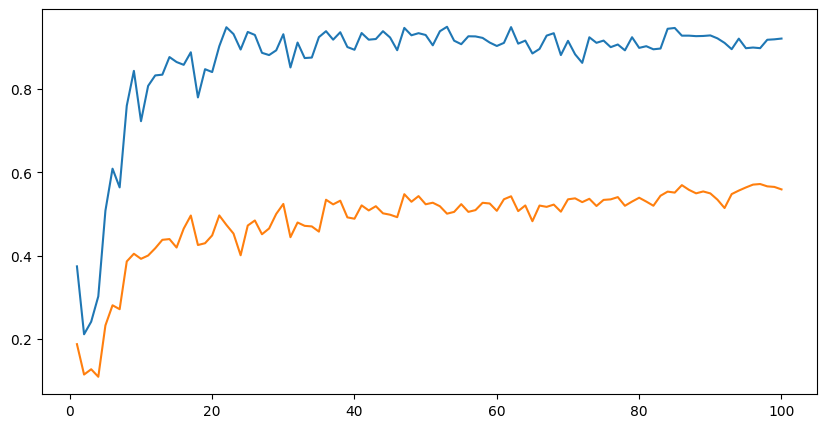

In [21]:
map_0_5 = results['metrics/mAP50(B)']
map_0_95 = results['metrics/mAP50-95(B)']

plt.figure(figsize = (10,5))
plt.plot(epochs,map_0_5,label = 'map0.5')
plt.plot(epochs,map_0_95,label = 'map0.95')
plt.xlabel(epochs)
plt.ylabel(Accuracy)
plt.legend()
plt.show()

In [22]:
model.save("best_licence_plate_model.pt")

In [23]:
results = model.predict('/kaggle/input/car-plate-detection/images/Cars0.png')


image 1/1 /kaggle/input/car-plate-detection/images/Cars0.png: 192x320 1 license_plate, 76.6ms
Speed: 1.1ms preprocess, 76.6ms inference, 1.5ms postprocess per image at shape (1, 3, 192, 320)


In [24]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[100,  75,  25],
         [159, 130,  73],
         [158, 127,  52],
         ...,
         [ 41,  39,  38],
         [ 36,  34,  33],
         [ 40,  38,  37]],
 
        [[101,  79,  31],
         [146, 121,  65],
         [151, 119,  46],
         ...,
         [ 32,  33,  31],
         [ 42,  43,  41],
         [ 27,  28,  26]],
 
        [[104,  87,  44],
         [139, 117,  65],
         [146, 116,  43],
         ...,
         [ 33,  37,  32],
         [ 36,  40,  35],
         [ 26,  30,  25]],
 
        ...,
 
        [[ 41,  49,  72],
         [ 42,  50,  73],
         [ 43,  51,  74],
         ...,
         [ 48,  67, 104],
         [ 48,  68, 103],
         [ 48,  67, 104]],
 
        [[ 44,  52,  75],
         [ 45,  53,  76],
         [ 44,  52,  75],
         ...,
         [ 

In [25]:
image = cv2.imread('/kaggle/input/car-plate-detection/images/Cars0.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8774], device='cuda:0')
data: tensor([[228.8100, 127.9067, 418.9530, 175.5196,   0.8774,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (268, 500)
shape: torch.Size([1, 6])
xywh: tensor([[323.8815, 151.7132, 190.1431,  47.6129]], device='cuda:0')
xywhn: tensor([[0.6478, 0.5661, 0.3803, 0.1777]], device='cuda:0')
xyxy: tensor([[228.8100, 127.9067, 418.9530, 175.5196]], device='cuda:0')
xyxyn: tensor([[0.4576, 0.4773, 0.8379, 0.6549]], device='cuda:0')


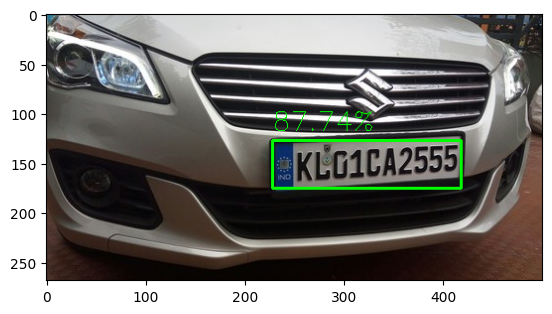

In [26]:
for result in results:
    for box in result.boxes:
        x1,y1,x2,y2 = map(int,box.xyxy[0])
        confidence = box.conf[0]
        cv2.rectangle(image,(x1,y1),(x2,y2),(0,256,0),2)
        cv2.putText(image,f'{confidence*100:.2f}%',(x1,y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,256,0))
        print(box)
plt.imshow(image)
plt.show()

In [27]:
#!pip install pytesseract

In [28]:
import pytesseract
from pytesseract import Output

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8774], device='cuda:0')
data: tensor([[228.8100, 127.9067, 418.9530, 175.5196,   0.8774,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (268, 500)
shape: torch.Size([1, 6])
xywh: tensor([[323.8815, 151.7132, 190.1431,  47.6129]], device='cuda:0')
xywhn: tensor([[0.6478, 0.5661, 0.3803, 0.1777]], device='cuda:0')
xyxy: tensor([[228.8100, 127.9067, 418.9530, 175.5196]], device='cuda:0')
xyxyn: tensor([[0.4576, 0.4773, 0.8379, 0.6549]], device='cuda:0')
Detected Licence Plate Number:EKLG1CA2555



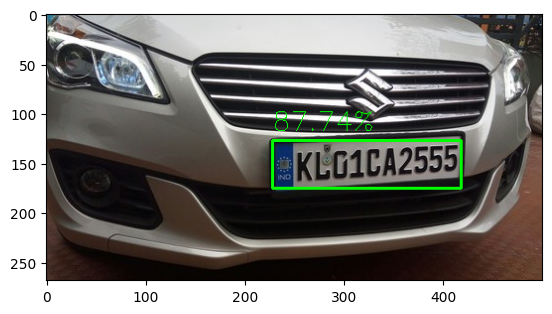

In [29]:
image = cv2.imread('/kaggle/input/car-plate-detection/images/Cars0.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

for result in results:
    for box in result.boxes:
        x1,y1,x2,y2 = map(int,box.xyxy[0])
        confidence = box.conf[0]
        cv2.rectangle(image,(x1,y1),(x2,y2),(0,256,0),2)
        cv2.putText(image,f'{confidence*100:.2f}%',(x1,y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,256,0))
        print(box)
        
        roi = image[y1:y2 , x1:x2]
        text = pytesseract.image_to_string(roi,config = '--psm 6')
        print(f"Detected Licence Plate Number:{text}")
        
        
plt.imshow(image)
plt.show()